In [1]:
# Let's import the necesary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the datasets

train_data = pd.read_csv("train.csv")  # Train dataset
test_data = pd.read_csv("test.csv")    # Test dataset
train_data["Source"] = 1         # Create "Source" column and filled it with Train
test_data["Source"] = 0           # Create "Source" column and filled it with Test
data = pd.concat([train_data, test_data], ignore_index=True) # Merge the train and test datasets with new name
data.head()   # Show the merged dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,1
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,1
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,1
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,1
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,1


In [3]:
# Shape of the dataset

data.shape

(1460, 82)

In [4]:
# Let's drop the "Id" columns which is not useful

data.drop(columns = ["Id"], axis=1, inplace=True)

In [5]:
# Let's set option to display all the rows

pd.set_option("display.max_rows",None)

In [6]:
# Quick information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Let's check the value counts of object column only

for column in data:
    if data[column].dtype=='object':
        print(data[column].value_counts())
        print()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

In [8]:
# Let's check the null values

feature = data.isnull().sum().keys().tolist()
miss_data = data.isnull().sum().values.tolist()
missing_report = pd.DataFrame(list(zip(feature,miss_data)), columns = ["Columns", "Missing Data"], index=range(1,len(feature)+1))
missing_report["Missing %"] = round(((missing_report["Missing Data"]/data.shape[0])*100),2)
missing_report

,Columns,Missing Data,Missing %
1,MSSubClass,0,0.00
2,MSZoning,0,0.00
3,LotFrontage,259,17.74
4,LotArea,0,0.00
5,Street,0,0.00
6,Alley,1369,93.77
7,LotShape,0,0.00
8,LandContour,0,0.00
9,Utilities,0,0.00
10,LotConfig,0,0.00


In [9]:
# Let's drop the most missed data columns

for col in data:
    if data[col].isnull().sum()*100/data.shape[0]>47:
        data.drop(col,axis=1,inplace=True)

dropped the columns in which there is huge data missing .

In [10]:
# Now Let's check the missing indexes

index_with_nan = data.index[data.isnull().any(axis=1)]
index_with_nan.shape

(589,)

589 Index have null values. But our dataset have 1460 total index. So, it wil be not good to drop these indexes. So, let's fill these missing index with their mean and mode values.

In [11]:
# Let's First separate the numerical columns and categorical columns

numerical = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical = data.select_dtypes(include=["object"]).columns.tolist()

In [12]:
# Now let's fill the null values present in the dataset

for column in data:
    if data[column].isnull().any():
        if column in categorical:
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].mean())

In [13]:
# Let's again check the null values if any present in the dataset

feature = data.isnull().sum().keys().tolist()
miss_data = data.isnull().sum().values.tolist()
missing_data = pd.DataFrame(list(zip(feature, miss_data)), columns = ["Columns", "Missed Data"], index=range(1,len(feature)+1))
missing_data["Missing %"] = round(((missing_data["Missed Data"]/data.shape[0])*100),2)
missing_data

,Columns,Missed Data,Missing %
1,MSSubClass,0,0.0
2,MSZoning,0,0.0
3,LotFrontage,0,0.0
4,LotArea,0,0.0
5,Street,0,0.0
6,LotShape,0,0.0
7,LandContour,0,0.0
8,Utilities,0,0.0
9,LotConfig,0,0.0
10,LandSlope,0,0.0


In [14]:
# Now let's check the 0 value counts of each column

for column in data[numerical]:
    print(column+"  =  "+str(data[data[column]==0].shape[0]))

MSSubClass  =  0
LotFrontage  =  0
LotArea  =  0
OverallQual  =  0
OverallCond  =  0
YearBuilt  =  0
YearRemodAdd  =  0
MasVnrArea  =  861
BsmtFinSF1  =  467
BsmtFinSF2  =  1293
BsmtUnfSF  =  118
TotalBsmtSF  =  37
1stFlrSF  =  0
2ndFlrSF  =  829
LowQualFinSF  =  1434
GrLivArea  =  0
BsmtFullBath  =  856
BsmtHalfBath  =  1378
FullBath  =  9
HalfBath  =  913
BedroomAbvGr  =  6
KitchenAbvGr  =  1
TotRmsAbvGrd  =  0
Fireplaces  =  690
GarageYrBlt  =  0
GarageCars  =  81
GarageArea  =  81
WoodDeckSF  =  761
OpenPorchSF  =  656
EnclosedPorch  =  1252
3SsnPorch  =  1436
ScreenPorch  =  1344
PoolArea  =  1453
MiscVal  =  1408
MoSold  =  0
YrSold  =  0
SalePrice  =  0
Source  =  292


Dataset has 1460 Rows, out of these Most of columns have huge amount of 0 values. So, let' drop that columns.

In [15]:
# Let's Drop the columns which have huge amount of 0 values

data.drop(columns=["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","EnclosedPorch","3SsnPorch",
                   "ScreenPorch","PoolArea","MiscVal"], axis=1, inplace=True)

In [16]:
# Let's again separate the numerical columns and categorical columns

numerical = data.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical = data.select_dtypes(include=["object"]).columns.tolist()

<AxesSubplot:>

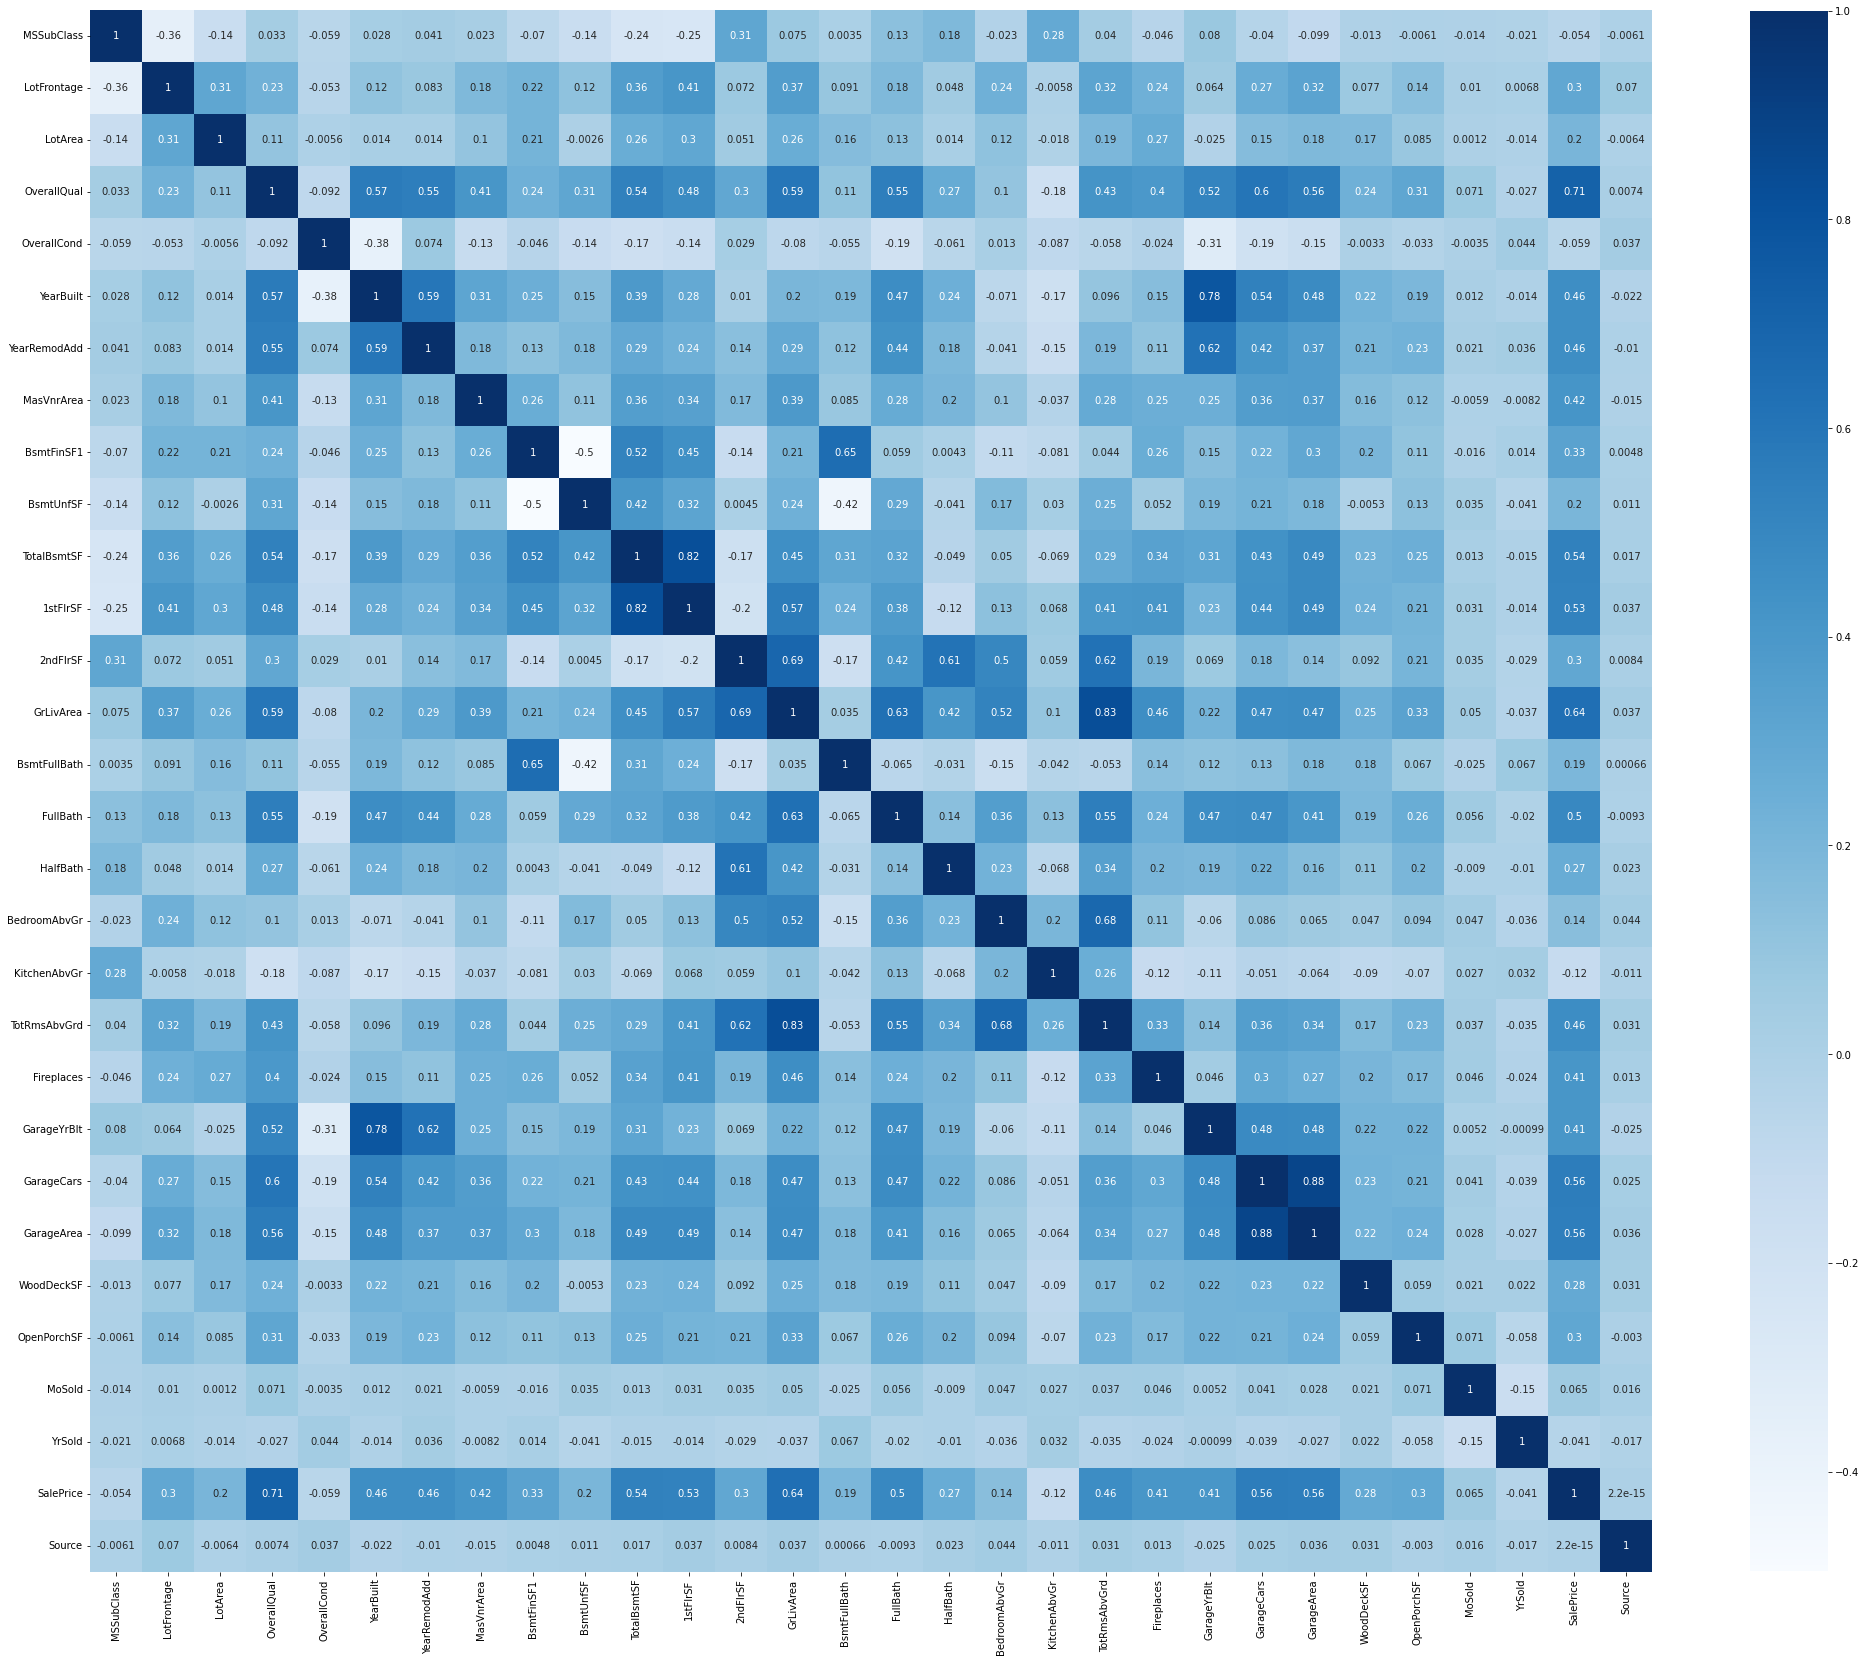

In [17]:
# Let's check the correlation matrix

corr = data[numerical].corr()

plt.figure(figsize=(35,35))
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink":.82}, annot_kws={"size":10}, cmap="Blues", square=True, fmt=".2g")


Total number of numerical columns count :  30
Total number of columns which are significant skewed :  23

'''
# zscore technique to remove the skewness

from scipy.stats import zscore

z = np.abs(zscore(data[numerical]))
data = data[(z<3).all(axis=1)]

'''

# zscore technique removed huge data. So, that's why I am not using it

In [18]:
# Let's remove the skewness with another technique

for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index] = np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index] = np.square(data[index])

In [19]:
# Let's again check the skewness

print(data.skew())
print("\n\nTotal number of numerical columns count : ",len(data.skew()))
print("Total number of columns which are significant skewed : ",len(data.skew().loc[abs(data.skew())>0.5]))

MSSubClass      0.248997
LotFrontage    -0.334414
LotArea        -0.137404
OverallQual     0.216944
OverallCond    -0.254015
YearBuilt      -0.586294
YearRemodAdd   -0.496132
MasVnrArea      0.481120
BsmtFinSF1     -0.380968
BsmtUnfSF      -1.105004
TotalBsmtSF    -3.445922
1stFlrSF        0.080114
2ndFlrSF        0.289643
GrLivArea      -0.006140
BsmtFullBath    0.419213
FullBath        0.036562
HalfBath        0.566168
BedroomAbvGr    0.211790
KitchenAbvGr    3.869414
TotRmsAbvGrd   -0.058258
Fireplaces      0.182083
GarageYrBlt    -0.644792
GarageCars     -0.342549
GarageArea      0.179981
WoodDeckSF      0.153537
OpenPorchSF    -0.023397
MoSold          0.212053
YrSold          0.096269
SalePrice      -0.052187
Source         -1.501543
dtype: float64


Total number of numerical columns count :  30
Total number of columns which are significant skewed :  7


In [20]:
# Now let's convert the categorical column to numerical columns

data = pd.get_dummies(data, drop_first=True)

print("Shape of the dataset after converting all categorical columns to numerical columns : ", data.shape)

Shape of the dataset after converting all categorical columns to numerical columns :  (1460, 226)


In [21]:
# Let's separate the train and test datasets

df_train = data.loc[data["Source"]==1]
df_test = data.loc[data["Source"]==0]

print("Train data columns : \n","="*20,"\n\n",df_train.columns, sep="")
print("\n\nTest data columns  : \n","="*20,"\n\n",df_test.columns,sep="")

Train data columns : 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)


Test data columns  : 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)


In [22]:
# Let's drop the "SalePrice" column from the Test Dataset as that is the output variable to be predict

df_test.drop("SalePrice", axis=1, inplace=True)

# Let's Reset the indexex

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Let's drop the "Source" column from train and test datasets

df_train.drop("Source", axis=1, inplace=True)
df_test.drop("Source", axis=1, inplace=True)

# Let's check the shape of both datasets

print("Shape of Train Dataset : ",df_train.shape)
print("Shape of Test Dataset  : ",df_test.shape)

Shape of Train Dataset :  (1168, 225)
Shape of Test Dataset  :  (292, 224)


In [23]:
# Let's import the necessary required libraries for model building

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [24]:
# Let's separate the input and output variables of train dataset for scaling

x = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

In [25]:
# Let's do the scaling

scaler = StandardScaler()
df_x = scaler.fit_transform(x)
df_x

array([[ 1.42570841,  0.07762063, -1.21764042, ..., -0.12510865,
         0.48577653, -0.31919711],
       [-1.13127766,  1.12140558,  1.09744261, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.4256774 ,  1.00793908,  0.16763133, ..., -0.12510865,
         0.48577653, -0.31919711],
       ...,
       [ 1.84272655, -2.99274656, -2.7435243 , ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.64732585, -0.98987252, -0.13826922, ..., -0.12510865,
         0.48577653, -0.31919711],
       [ 0.4256774 ,  0.07762063, -0.29301727, ..., -0.12510865,
         0.48577653, -0.31919711]])

Number of components explained 99% variance :  178


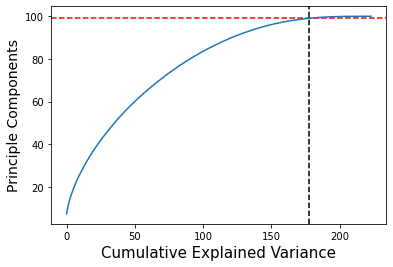

In [26]:
# There are so many columns so let's use the PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

test_pca = PCA()
test_pca.fit(df_x)

var_cumu = np.cumsum(test_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>99)

print("Number of components explained 99% variance : ",k)

plt.xlabel("Cumulative Explained Variance", fontsize=15)
plt.ylabel("Principle Components",fontsize=14)
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
plt.plot(var_cumu)
plt.show()

Out of 224 columns, only 178 columns is giving the 99% variance. So, let's use the PCA technique

In [27]:
# PCA Scaling for model building

pca = PCA(n_components=178)
xx = pca.fit_transform(df_x)
xx

array([[ 0.55167327, -1.68243849, -2.75687145, ...,  1.99342396,
        -0.1240521 ,  0.01203243],
       [-1.47540331, -4.29410795,  5.16881094, ...,  0.19853449,
         0.45050021, -0.03537418],
       [-3.03321462,  0.29021695,  1.23491616, ..., -0.26291445,
        -0.0646403 , -0.21386032],
       ...,
       [ 1.3150646 ,  0.89357769, -2.5242828 , ..., -0.96935954,
         0.03944715,  0.50513319],
       [ 7.33427706,  4.67216553,  2.63441038, ..., -0.7082029 ,
         0.24001751, -0.10621998],
       [-4.05576031,  1.90092431, -0.43732493, ...,  0.27318095,
        -0.09988031, -0.07102832]])

In [28]:
# Let's find best score with best state

def beststate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(72,75):
        x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best R2_Score          : ",max_score)
    print("Cross Validation Score : ",cross_val_score(mod, xx, y, cv=5, scoring="r2").mean())
    end = time()
    print("\nTime taken by model for prediction {:.4f} seconds".format(end-start))


In [29]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
beststate(DTR)

Best Random State      :  72
Best R2_Score          :  0.6217628370389854
Cross Validation Score :  0.567474219343836

Time taken by model for prediction 1.5709 seconds


In [30]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
beststate(KNR)

Best Random State      :  74
Best R2_Score          :  0.7839475475533682
Cross Validation Score :  0.7197611913309278

Time taken by model for prediction 0.1239 seconds


In [31]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
beststate(RFR)

Best Random State      :  74
Best R2_Score          :  0.8507067334231435
Cross Validation Score :  0.7962935546279176

Time taken by model for prediction 86.6546 seconds


In [32]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
beststate(GBR)

Best Random State      :  74
Best R2_Score          :  0.8769160345428648
Cross Validation Score :  0.8253255263968985

Time taken by model for prediction 49.8110 seconds


In [33]:
# Support Vector Machine

from sklearn.svm import SVR

Svr = SVR()
beststate(Svr)

Best Random State      :  74
Best R2_Score          :  0.8152295286391394
Cross Validation Score :  0.7570239627656752

Time taken by model for prediction 0.7914 seconds


After analyzing the scores and cross validation scores of above 5 models. Now it is clear that Gradient Boosting Regressor is giving the best score than others. So, let's try to increase the score using HyperParameter Tuning.

# Final Model (Gradient Boosting Regressor)

# Saving The Final Model

In [35]:
# Hyper Parameter Tuning with Gradient Boosting Regressor

x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=74)


In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
param_grid = {"min_samples_leaf" : [1,2], "min_samples_split" : [2,3], "n_estimators" : [100,200], "learning_rate" : [0.1,0.2]}
grid_search = GridSearchCV(GBR, param_grid=param_grid)

In [38]:
grid_search.fit(x_train, y_train)
grid_search.best_params_


{'learning_rate': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [39]:
# Final Model

Final_Model = GradientBoostingRegressor(learning_rate=0.1,min_samples_split=2,min_samples_leaf=1,n_estimators=200)
x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=74)
Final_Model.fit(x_train, y_train)
y_pred = Final_Model.predict(x_test)
r2_score(y_test, y_pred)

0.880398996397358

In [40]:
# Now Let's transform the df_test data according to pca for sale price prediction

df_test_pca = pca.transform(df_test)
sale_pred = Final_Model.predict(df_test_pca)

# Let's make the data frame for sale price prediction

predict_sale_price = pd.DataFrame(sale_pred, columns = ["Sale Price"])

# Let's save the submission to csv file

predict_sale_price.to_csv("Sale Price Predictions.csv",index=False)

# Saving The Final Model

In [41]:
import joblib
joblib.dump(Final_Model,"Final_Model.pkl")

['Final_Model.pkl']

# Loading The Final Model

In [42]:
model = joblib.load("Final_Model.pkl")
pd.DataFrame(model.predict(xx))

,0
0,11.762696
1,12.485811
2,12.456272
3,12.150956
4,12.287249
5,12.290282
6,11.917236
7,11.989963
8,11.833716
9,11.703008


# END OF THE PROJECT